In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from glob import glob

In [2]:
image_size = [224, 224]

In [3]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [12]:
folders = glob('tomato/train/*')

In [13]:
folders

['tomato/train\\Tomato___Bacterial_spot',
 'tomato/train\\Tomato___Early_blight',
 'tomato/train\\Tomato___healthy',
 'tomato/train\\Tomato___Late_blight',
 'tomato/train\\Tomato___Leaf_Mold',
 'tomato/train\\Tomato___Septoria_leaf_spot',
 'tomato/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'tomato/train\\Tomato___Target_Spot',
 'tomato/train\\Tomato___Tomato_mosaic_virus',
 'tomato/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [14]:
x = Flatten()(vgg.output)

In [15]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [19]:
train_set = train_data_gen.flow_from_directory('tomato/train/',
                                               target_size = (224,224), 
                                               batch_size = 32, 
                                               class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [20]:
test_set = test_data_gen.flow_from_directory('tomato/valid/', 
                                             target_size = (224,224), 
                                             batch_size = 32, 
                                             class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [25]:
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set)
)

Epoch 1/20
574/574 [==============================] - 3938s 7s/step - loss: 0.7344 - accuracy: 0.7550 - val_loss: 0.3629 - val_accuracy: 0.8766
Epoch 2/20
574/574 [==============================] - 4703s 8s/step - loss: 0.4158 - accuracy: 0.8590 - val_loss: 0.5132 - val_accuracy: 0.8301
Epoch 3/20
574/574 [==============================] - 4698s 8s/step - loss: 0.3594 - accuracy: 0.8807 - val_loss: 0.4318 - val_accuracy: 0.8639
Epoch 4/20
574/574 [==============================] - 4687s 8s/step - loss: 0.2907 - accuracy: 0.9023 - val_loss: 0.3723 - val_accuracy: 0.8818
Epoch 5/20
574/574 [==============================] - 4710s 8s/step - loss: 0.2699 - accuracy: 0.9079 - val_loss: 0.3482 - val_accuracy: 0.8942
Epoch 6/20
574/574 [==============================] - 4617s 8s/step - loss: 0.2519 - accuracy: 0.9162 - val_loss: 0.2968 - val_accuracy: 0.9034
Epoch 7/20
574/574 [==============================] - 4496s 8s/step - loss: 0.2130 - accuracy: 0.9273 - val_loss: 0.5085 - val_accuracy:

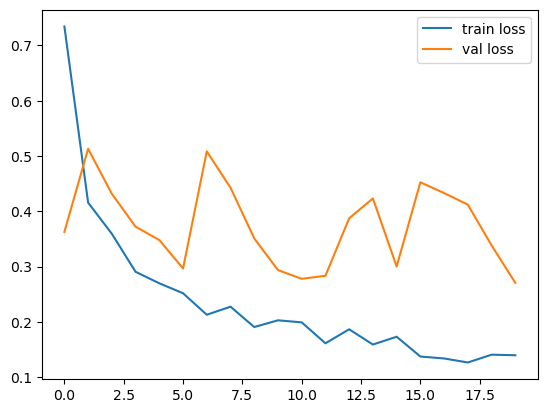

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

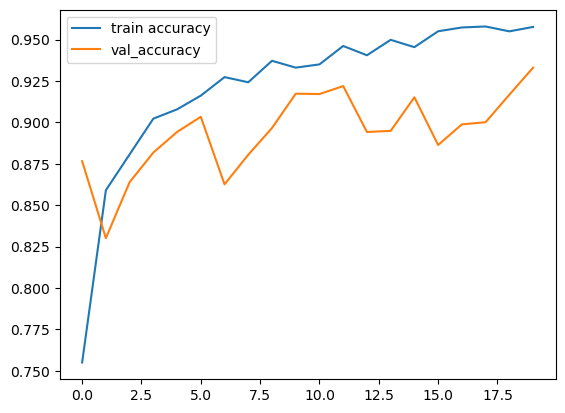

In [27]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato/train",
    shuffle=True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 18345 files belonging to 10 classes.


In [30]:
dataset_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato/valid",
    shuffle=True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4585 files belonging to 10 classes.


In [31]:
class_names = dataset_valid.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [32]:
def get_dataset(dataset_train, dataset_valid, val_split=0.5, test_split = 0.5, shuffle = True, shuffle_size=10000):
    ds_size = len(dataset_valid)
    if shuffle:
        dataset_train = dataset_train.shuffle(shuffle_size, seed= 12)
        dataset_valid = dataset_valid.shuffle(shuffle_size, seed= 12)
    
    val_size = int(val_split*ds_size)
    val_ds=dataset_valid.take(val_size)
    test_ds = dataset_valid.skip(val_size)
    return dataset_train, val_ds, test_ds

In [33]:
train_ds, val_ds, test_ds = get_dataset(dataset_train, dataset_valid)

In [35]:
import tensorflow as tf

train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_ds = val_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Actual the leaf is : Tomato___Septoria_leaf_spot
Prediction of the image is : Tomato___Septoria_leaf_spot


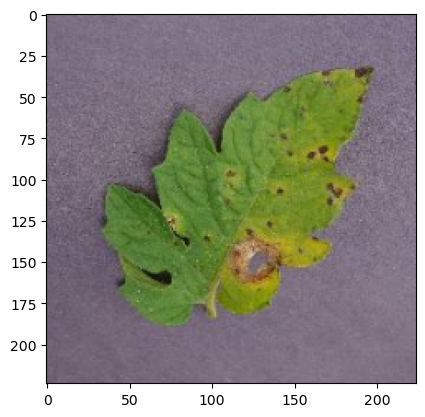

In [36]:
import numpy as np
for image_batch, labels_batch in dataset_train.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    plt.imshow(first_image)
    print('Actual the leaf is :', class_names[first_label])
    prediction = model.predict(image_batch)
    print('Prediction of the image is :', class_names[np.argmax(prediction[0])])

In [37]:
def predict(model, image):
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array, 0)
    
    prediction = model.predict(image_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])), 2)
    return predicted_class, confidence

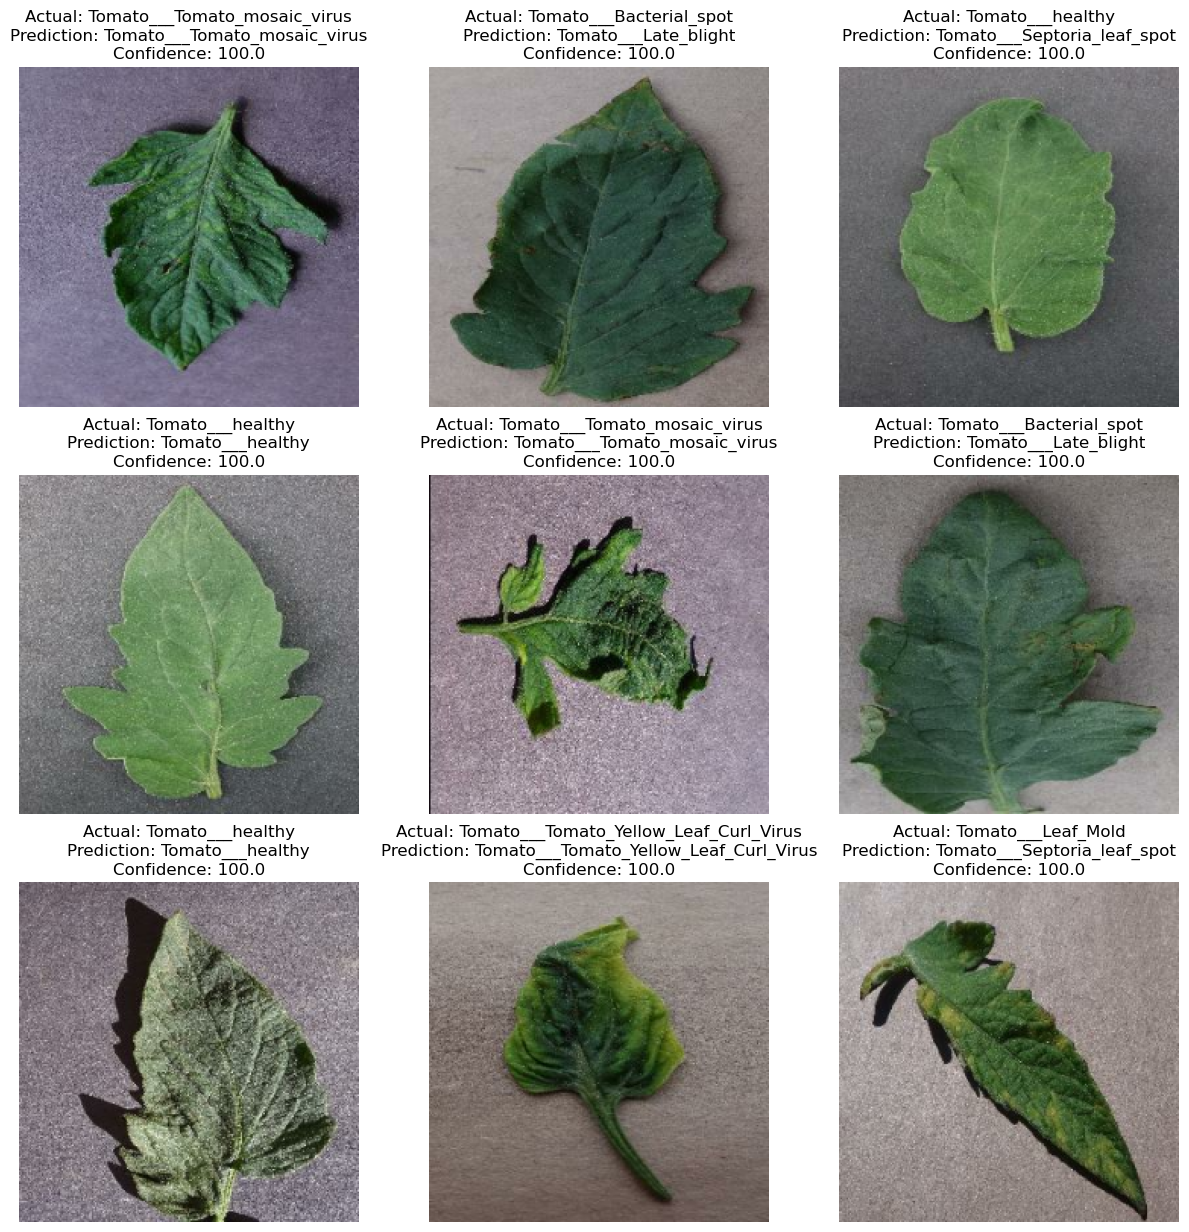

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        prediction_class, confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPrediction: {prediction_class}\nConfidence: {confidence}")
        plt.axis('off')

In [39]:
from tensorflow.keras.models import load_model
model.save('vgg16_model.h5')